## Currently easy trials are not removed for any plot, however all results are the same if you do remove easy trials

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from cycler import cycler
import popoff
import pop_off_functions as pof
import pop_off_plotting as pop
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
from utils.utils_funcs import d_prime
from tqdm import tqdm
import svgutils.compose as sc
import IPython.display as ip

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [3]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

for ss in pas.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [4]:
# pas.sessions
print(pas.plot_string(is_plot=False))

Hello Adam
Remove targets is False.
Remove too soon is True
Here are the sessions in play:
['Mouse J064, run 10', 'Mouse J064, run 11', 'Mouse J064, run 14', 'Mouse RL070, run 28', 'Mouse RL070, run 29', 'Mouse RL117, run 29', 'Mouse RL117, run 30', 'Mouse RL123, run 22', 'Mouse RL116, run 32', 'Mouse RL116, run 33']
pre-frames spans -0.5 to -0.1 inclusive
post-frames spans 0.83 to 6.0 inclusive


(-0.5, 2.5)

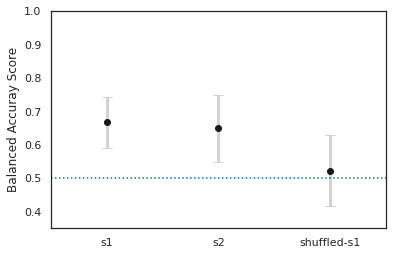

In [96]:
coefs = pas.compare_regions_all_sessions(frames = 'pre', make_plot=True)
plt.ylabel('Balanced Accuray Score')
plt.ylim(0.35, 1)
plt.xlim(-0.5, 2.5)

# save_figure('Figure4_pre-stim-allCellsDecoder_S1S2null')

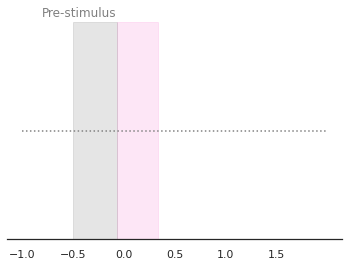

In [17]:
pop.pre_stim_sketch()

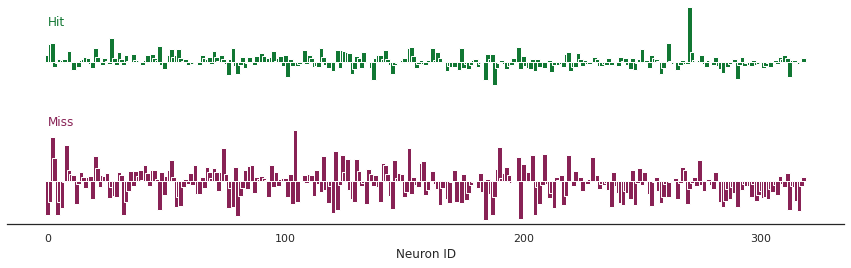

In [12]:
lm = pas.linear_models[0]
pop.firing_rate_dist(lm, region='s1', match_tnums=False, sort=False)
# save_figure('Figure4_firingRateDist')

In [20]:
reg_list = ['s1', 's2']
cov_dicts = {x: {} for x in reg_list}
super_covar_df_dict = {}
for i_reg, reg in enumerate(reg_list):
    print(reg)
    for i_lm, linear_model in tqdm(enumerate(pas.linear_models)):
        cov_dicts[reg][i_lm] = pof.get_covariates(linear_model, reg)

    super_covar_df_dict[reg] = pof.create_df_from_cov_dicts(cov_dicts=cov_dicts[reg], 
                                                  zscore_list=['variance_cell_rates'])

0it [00:00, ?it/s]

s1


10it [01:31,  9.19s/it]
0it [00:00, ?it/s]

s2


10it [01:15,  7.59s/it]


In [149]:
cov_dicts['s1'][0].keys()#['trial_number']

dict_keys(['trial_mean', 'delta_f', 'mean_pre', 'mean_post', 'corr_pre', 'corr_post', 'largest_singular_value', 'largest_PC_var', 'largest_factor_var', 'flat', 'trial_number', 'flattened_variance', 'variance_pop_mean', 'variance_cell_rates', 'mean_cell_variance', 'reward_history', 'n_cells_stimmed', 'lick', 'reward', 'jonas_metric', 'y'])

Session 0, LinregressResult(slope=-0.134329686737248, intercept=0.8161898321983342, rvalue=-0.9463676133961008, pvalue=9.325160752266997e-18, stderr=0.00798327627319934, intercept_stderr=0.002954420215858118)
Session 1, LinregressResult(slope=-0.15744472917199834, intercept=0.683877048351051, rvalue=-0.9283292914176333, pvalue=9.809648373534891e-26, stderr=0.008425457786794646, intercept_stderr=0.00378809112429333)
Session 2, LinregressResult(slope=-0.215433858544543, intercept=0.7262015827479701, rvalue=-0.9526947179005392, pvalue=1.0950713424704104e-31, stderr=0.009024397155298776, intercept_stderr=0.004723485078813737)
Session 3, LinregressResult(slope=-0.10207154460700106, intercept=0.2843478997427719, rvalue=-0.9051578846701899, pvalue=8.03521338432943e-63, stderr=0.0037430404986740352, intercept_stderr=0.0026049013957556515)
Session 4, LinregressResult(slope=-0.24637549926054314, intercept=0.6132484299043421, rvalue=-0.9701284827754688, pvalue=4.9891847032050395e-67, stderr=0.005

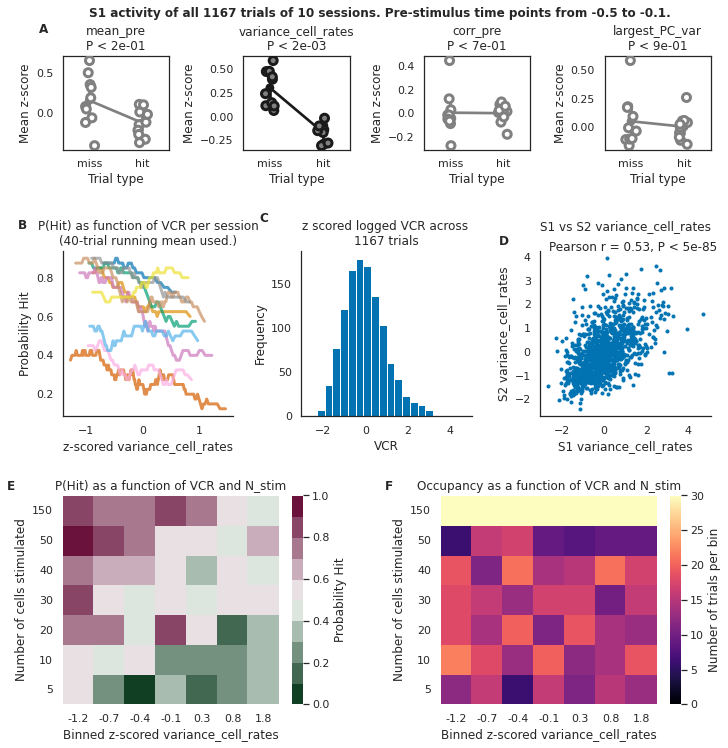

In [6]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs_top = fig.add_gridspec(ncols=4, nrows=1, bottom=0.82, top=0.95, right=0.95, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=3, nrows=1, bottom=0.45, top=0.68, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.34, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre', 'largest_PC_var']
n_bins = 7
region = 's1'

ax_cov_scatter = {x: fig.add_subplot(gs_top[i_x]) for i_x, x in enumerate(cov_names)}
ax_vcr_lines = fig.add_subplot(gs_middle[0])
ax_vcr_hist = fig.add_subplot(gs_middle[1])
ax_vcr_s1s2 = fig.add_subplot(gs_middle[2])
ax_matrices = {i_x: fig.add_subplot(gs_bottom[i_x]) for i_x in range(2)}

pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)

pop.hist_covar(ax=ax_vcr_hist, super_covar_df=super_covar_df_dict[region])

pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrices[0])
pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='occupancy', ax=ax_matrices[1])

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')
ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
                                  x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-0.95, y=1, fontdict={'weight': 'bold'})
ax_vcr_lines.text(s='B', x=-2.2, y=1.05, fontdict={'weight': 'bold'})
ax_vcr_hist.text(s='C', x=-5, y=220, fontdict={'weight': 'bold'})
ax_vcr_s1s2.text(s='D', x=-5, y=4.5, fontdict={'weight': 'bold'})
ax_matrices[0].text(s='E', x=-1.8, y=7.2, fontdict={'weight': 'bold'})
ax_matrices[1].text(s='F', x=-1.8, y=7.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig(f'/home/tplas/repos/popping-off/figures/snr_overview/snr_overview_{region}_prestim{signature_time}_{len(super_covar_df_dict[region])}sessions.pdf',
                bbox_inches='tight')

WilcoxonResult(statistic=0.0, pvalue=0.001953125)


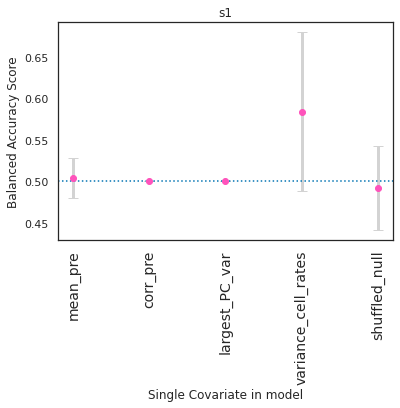

In [86]:
pas.single_covariate(region=region)
# save_figure(f'Figure4_singleCovarite_{region}')

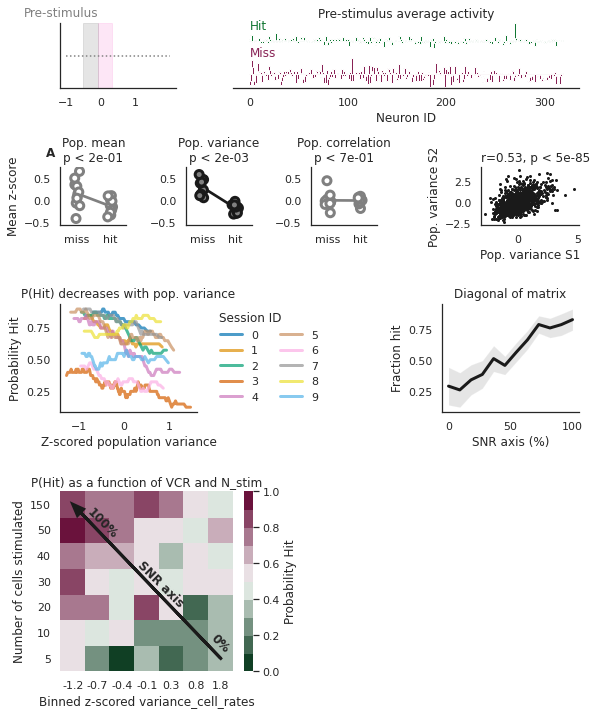

In [62]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(8, 10))
gs_sketch_left = fig.add_gridspec(ncols=1, nrows=1, bottom=0.86, top=0.95, right=0.25, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_sketch_right = fig.add_gridspec(ncols=1, nrows=2, bottom=0.86, top=0.95, right=0.95, left=0.35, 
                          hspace=0.05, wspace=0.7)
gs_top_left = fig.add_gridspec(ncols=3, nrows=1, bottom=0.67, top=0.75, right=0.6, left=0.05, 
                          hspace=0.3, wspace=0.9)
gs_top_right = fig.add_gridspec(ncols=1, nrows=1, bottom=0.67, top=0.75, right=0.95, left=0.78, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=3, nrows=1, bottom=0.41, top=0.56, right=0.95, left=0.05, 
                             hspace=0.8, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.3, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre']
n_bins = 7
region = 's1'

ax_sketch = fig.add_subplot(gs_sketch_left[0])
ax_hit_vcr = fig.add_subplot(gs_sketch_right[0])
ax_miss_vcr = fig.add_subplot(gs_sketch_right[1])
ax_cov_scatter = {x: fig.add_subplot(gs_top_left[i_x]) for i_x, x in enumerate(cov_names)}
# ax_classifier = fig.add_subplot(gs_middle[0])
ax_vcr_s1s2 = fig.add_subplot(gs_top_right[0])
ax_vcr_lines = fig.add_subplot(gs_middle[0])
ax_collapsed_matrix = fig.add_subplot(gs_middle[2])
ax_matrix = fig.add_subplot(gs_bottom[0])

pop.pre_stim_sketch(ax=ax_sketch)
pop.firing_rate_dist(lm=pas.linear_models[0], region='s1', match_tnums=False, sort=False,
                      ax_hit=ax_hit_vcr, ax_miss=ax_miss_vcr)
pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)
ax_vcr_lines.set_title('P(Hit) decreases with pop. variance')
pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_collapsed_matrix, pool_trials=True)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix,  plot_arrow=True)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')

# fig.align_ylabels(axs=[ax_cov_scatter['mean_pre'], ax_cov_scatter, ax_matrix])
# ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
#                                   x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-0.95, y=1, fontdict={'weight': 'bold'})
# ax_vcr_lines.text(s='B', x=-2.2, y=1.05, fontdict={'weight': 'bold'})
# ax_vcr_hist.text(s='C', x=-5, y=220, fontdict={'weight': 'bold'})
# ax_vcr_s1s2.text(s='D', x=-5, y=4.5, fontdict={'weight': 'bold'})
# ax_matrices[0].text(s='E', x=-1.8, y=7.2, fontdict={'weight': 'bold'})
# ax_matrices[1].text(s='F', x=-1.8, y=7.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig(f'/home/tplas/repos/popping-off/full_figs_manuscript/fig_4_wo_schem.svg',
                bbox_inches='tight')

Session 0, LinregressResult(slope=-0.134329686737248, intercept=0.8161898321983342, rvalue=-0.9463676133961008, pvalue=9.325160752266997e-18, stderr=0.00798327627319934, intercept_stderr=0.002954420215858118)
Session 1, LinregressResult(slope=-0.15744472917199834, intercept=0.683877048351051, rvalue=-0.9283292914176333, pvalue=9.809648373534891e-26, stderr=0.008425457786794646, intercept_stderr=0.00378809112429333)
Session 2, LinregressResult(slope=-0.215433858544543, intercept=0.7262015827479701, rvalue=-0.9526947179005392, pvalue=1.0950713424704104e-31, stderr=0.009024397155298776, intercept_stderr=0.004723485078813737)
Session 3, LinregressResult(slope=-0.10207154460700106, intercept=0.2843478997427719, rvalue=-0.9051578846701899, pvalue=8.03521338432943e-63, stderr=0.0037430404986740352, intercept_stderr=0.0026049013957556515)
Session 4, LinregressResult(slope=-0.24637549926054314, intercept=0.6132484299043421, rvalue=-0.9701284827754688, pvalue=4.9891847032050395e-67, stderr=0.005

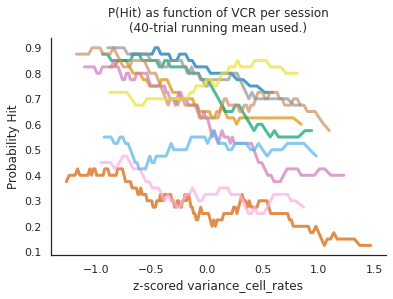

In [65]:
pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=None, sessions=pas.sessions)

In [ ]:
sc.Figure('19.5cm', '11.7cm',
          sc.Panel(sc.SVG('figures/thesis/fig1_AB.svg').scale(3).move(4, 4)),
          sc.Panel(sc.SVG('figures/thesis/fig1_C.svg').scale(1).move(-4, 265))
                  ).save('figures/thesis/fig1_complete.svg')
ip.SVG('figures/thesis/fig1_complete.svg')

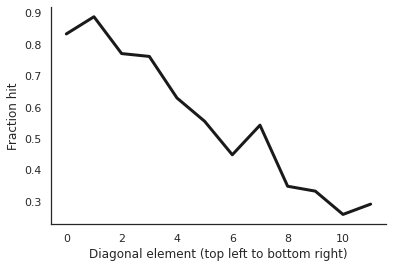

In [15]:
tmp = pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict['s1'])
plt.savefig('/home/tplas/repos/popping-off/figures/snr_overview/mat_diag_0,5_S1.svg')

part 0.8333333333333334 72
pool 0.8333333333333334 72
part 1.0 6
part 0.7763157894736842 76
pool 0.7926829268292683 82
part 0.7368421052631579 19
part 0.8125 16
part 0.7631578947368421 76
pool 0.7657657657657657 111
part 0.8333333333333334 18
part 0.6363636363636364 11
part 0.7647058823529411 17
part 0.8125 80
pool 0.7936507936507936 126
part 0.7222222222222222 18
part 0.5 16
part 0.6666666666666666 21
part 0.5555555555555556 9
part 0.7023809523809523 84
pool 0.668918918918919 148
part 0.5 22
part 0.7142857142857143 14
part 0.46153846153846156 13
part 0.5714285714285714 14
part 0.5 8
part 0.5833333333333334 84
pool 0.567741935483871 155
part 0.5 12
part 0.4444444444444444 18
part 0.4 20
part 0.5294117647058824 17
part 0.3333333333333333 15
part 0.4444444444444444 9
part 0.4875 80
pool 0.4619883040935672 171
part 0.25 16
part 0.5384615384615384 13
part 0.8181818181818182 11
part 0.4117647058823529 17
part 0.5714285714285714 21
part 0.6666666666666666 9
pool 0.5172413793103449 87
part 0.

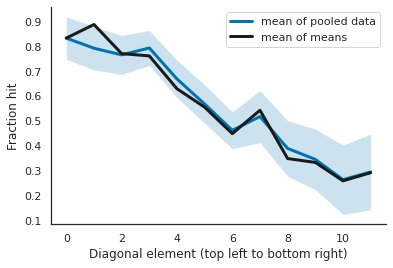

In [101]:
ax = plt.subplot(111)
diag_arr = np.arange(len(mean_mat_arr))
ax.plot(diag_arr, mean_mat_arr, linewidth=3, label='mean of pooled data')
ax.fill_between(diag_arr, mean_mat_arr - ci_mat_arr, mean_mat_arr + ci_mat_arr, alpha=0.2)

tmp = pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict['s1'])

ax.legend()

In [149]:
tmp = pof.log_reg_covars(covar_dict=cov_dicts, hard_balance=False, zscore_data=True)

mean_pre False
mean_pre True
mean_pre True
mean_pre True
mean_pre True
mean_pre True
mean_pre True
mean_pre False
mean_pre True
mean_pre False
corr_pre False
corr_pre True
corr_pre False
corr_pre True
corr_pre False
corr_pre False
corr_pre False
corr_pre True
corr_pre False
corr_pre False
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True
variance_cell_rates True


In [135]:
tmp

({'mean_pre': array([0.5       , 0.5       , 0.48076923, 0.5       , 0.49137931,
         0.48684211, 0.5       , 0.5       , 0.52380952, 0.5       ]),
  'corr_pre': array([0.5       , 0.5       , 0.5       , 0.5       , 0.50862069,
         0.51315789, 0.5       , 0.47619048, 0.5       , 0.5       ]),
  'variance_cell_rates': array([0.5       , 0.5       , 0.5       , 0.5       , 0.68965517,
         0.5       , 0.51428571, 0.5       , 0.47619048, 0.49019608])},
 {'mean_pre': array([0.        , 0.        , 0.00110947, 0.00029727, 0.00022295,
         0.00051939, 0.00042017, 0.00108225, 0.00051536, 0.00019608]),
  'corr_pre': array([0.        , 0.        , 0.00147929, 0.00029727, 0.00022295,
         0.00051939, 0.00042017, 0.00051536, 0.00108225, 0.00019608]),
  'variance_cell_rates': array([0.00000000e+00, 0.00000000e+00, 1.47928994e-03, 1.48632580e-03,
         5.94530321e-04, 6.92520776e-04, 2.16086435e-04, 1.08225108e-03,
         5.15357658e-04, 9.99615532e-05])})

In [136]:
np.mean(tmp[0]['variance_cell_rates'])

0.5170327441321356

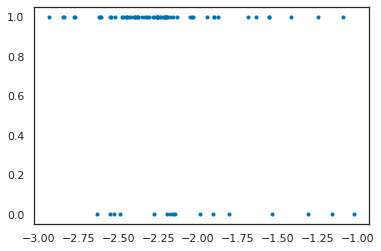

In [239]:
plt.plot(cov_dicts['s1'][0]['variance_cell_rates'],
         cov_dicts['s1'][0]['y'], '.')